#  Amazon Fine Food Sentiment Analysis

# Objective:

For given a text review from Amazon Fine food dataset , determine the text of the review whether its positive or negative sentiment given by users.

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

# Dataset Description

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon with UserID and ProductID having following:

Total Number of reviews: 568,454

Total Number of users: 256,059

Number of products: 74,258

Timespan: Oct 1999 - Oct 2012

Number of Attributes/Columns in data: 10

Attribute Information:

Id:serial number

ProductId - column for unique identifier for each product

UserId - column for unqiue identifier for each user

ProfileName - Profile name for each individual user

HelpfulnessNumerator - column indicating number of users who found the review helpful from given 

HelpfulnessDenominator - column for number of users who indicated whether they found the review helpful or not

Score - Rating between 1 and 5

Time - Timestamp for the review

Summary - Brief summary of the review

Text - Text of the review

For the given description of dataset help us to decide what all Natural Language Processing techniques needs to be performed for analyzing text review of Amazon dataset.

### Importing Libraries

Description of Libraries used for NLP Technique are as given and reason as why they are used:
##### (1) warnings library

        warnings module is used to warn a programmer about changes in language or library. A programmer can face a same warning multiple times. So, to avoid this annoying situation, warnings module is used. 
        
##### (2) nltk ( Natural Language Toolkit)

        NLTK is a very useful Python package that provides a set of diverse natural languages algorithms.It comes with all pre-built function for processing large text. It is free, opensource, easy to use, large community, and well documented.nltk module is used to work with human language data. It provides us a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries. 
        
##### (3) re library        

        Regular Expression is a sequence of characters that forms a search pattern. It is used for describing a search pattern. This module helps us to perform regular expression matching operations.Whatever is included in the given quotes that is been searched and matched in the document. re library have some predefined regular expression that is being matched with loaded deaset.
        
##### (4) nltk.corpus

        Corpus is a collection of texts in a machine reading format. It can be thought as just a bunch of text files in a directory. Here we are importing stopwords corpus from the ntlp.corpus library. Stopwords corpus include high-frequency words like the, to and also that we sometimes want to filter out of a document before further processing.
        
##### (5) nltk.stem

        Stemming is a process of reducing the derived words to their root. There are various algorithms available for stemming like Potter’s Stemmer algorithm, Lovins Stemmer, Dawson Stemmer, Krovetz Stemmer, etc. Here we will be using Porter Stemmer. It is one of the most popular stemming methods proposed in 1980. It is based on the idea that the suffixes in the English language are made up of a combination of smaller and simpler suffixes.
        
        Example: EED -> EE means “if the word has at least one vowel and consonant plus EED ending, change the ending to EE” as ‘agreed’ becomes ‘agree’.
        
        Lemmatization is the process of converting a word to its base form. 
        
* The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

        Example: ‘Caring’ -> Lemmatization -> ‘Care’
                 ‘Caring’ -> Stemming -> ‘Car’

        Here we will be using Wordnet Lemmatizer to lemmatize all the sentences.

        

In [3]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np    
import pandas as pd 
import nltk  
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
#nltk.download('wordnet')


## Importing Dataset 
##### Importing dataset in form of .csv(comma seperated file) using the name df  for further excecution

In [4]:
# Copy the same path of .csv file where it is located in your folder and then changing '\' to '/' for reading file successfully
df=pd.read_csv("E:/Garima folder/Dataset/Reviews.csv")
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


# DATA PRE-PROCESSING

Data Cleaning is a process of cleaning the data according to our model requirements and situation.

A solution may not need all the data you got

- you might have to remove columns, modify columns, 
- remove duplicate values, 
- deal with missing values, 
- deal with outlier data etc. 
- Sometimes you will also need to normalize or scale data to make the data fit within a range. 
This process in general is known as Data Cleaning.

#### Getting the shape of the dataframe

In [5]:
print(df.shape)

(568454, 10)


* HelfulnessNumerator tells about number of people found that review usefull.
* HelpfulnessDenominator is about usefull review count + not so usefull count. 
* And hence,HelfulnessNumerator is always less than or equal to HelpfulnesDenominator.

In [6]:
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


### Checking for the missing values and datatypes for each columns in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568452 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568452 non-null int64
ProductId                 568452 non-null object
UserId                    568452 non-null object
ProfileName               568436 non-null object
HelpfulnessNumerator      568452 non-null int64
HelpfulnessDenominator    568452 non-null int64
Score                     568452 non-null int64
Time                      568452 non-null int64
Summary                   568425 non-null object
Text                      568452 non-null object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


* Checking for the NA values in the dataset

In [8]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

* Since we are concern with sentimenal analysis of the text review in Amazon dataset ,we will keep only 'Text' and the 'Score' column.

In [9]:
df=df[['Text','Score']]

* Changing Text column to Review column and Score column to Rating for better understanding

In [10]:
df['review']=df['Text']
df['rating']=df['Score']
df.drop(['Text','Score'],axis=1,inplace=True)

In [11]:
print(df.shape)
df.head()

(568452, 2)


,review,rating
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


#### check for null values

In [12]:
print(df['rating'].isnull().sum())
df['review'].isnull().sum()  # no null values.

0


0

* There is no point for keeping rows with different scores or sentiment for same review text. So we will keep only one instance and drop the rest of the duplicates.


##### remove duplicates/ for every duplicate we will keep only one row of that type - the row which comes first

In [13]:
df.drop_duplicates(subset=['rating','review'],keep='first',inplace=True) 

In [14]:
# now check the shape. note that shape is reduced which shows that we did has duplicate rows.
print(df.shape)
df.head()

(393673, 2)


,review,rating
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


##  The main objective for this dataset is to predict whether a review is Positive or Negative based on the Text column.
 The Score column has values 1,2,3,4, and 5.
 
 Considering (1, 2) as Negative reviews and (4, 5) as Positive reviews. 
 For Score = 3 we will consider it as Neutral review.
 Then we delete the rows that are neutral, so that we can predict either given Review is Positive or Negative.

In [15]:
len(df[df['rating']== 3])

29772

* After removing of Score= 3

total reviews(393673) - neutral reviews(42640)= 351033(Positive_reviews+ Negative_reviews)

### Removing of neutral review 

In [16]:
def mark_sentiment(rating):
    if(rating<=3):
        return 0
    else:
        return 1

In [17]:
df['sentiment']=df['rating'].apply(mark_sentiment)

In [18]:
df.drop(['rating'],axis=1,inplace=True)
df.head()

,review,sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


##### Counting the number of positive and negaive Reviews marked with 0  for negative and 1 with positive

In [19]:
df['sentiment'].value_counts()

1    306817
0     86856
Name: sentiment, dtype: int64

In [20]:
df.dropna(inplace = True )    
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [21]:
df.describe(include = 'O')  

,review
count,393673
unique,393577
top,I compared 4 different brands of matcha green ...
freq,3


##### Pre- Processing of all the reviews is taking way too much time and so we will consider only 100K reviews. To balance the class we have taken equal instances of each sentiment.

In [22]:
'''pos_df=df.loc[df.sentiment==1,:][:50000]
neg_df=df.loc[df.sentiment==0,:][:50000]'''


'pos_df=df.loc[df.sentiment==1,:][:50000]\nneg_df=df.loc[df.sentiment==0,:][:50000]'

In [23]:
#pos_df.head()

In [24]:
#neg_df.head()


In [25]:
#We can now combine reviews of each sentiment and shuffle them so that their order doesn't make any sense

#df=pd.concat([pos_df,neg_df],ignore_index=True)
print(df.shape)
df.head()

(393673, 2)


,review,sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


## Text Pre-processing

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Pre-processing is the step of converting textual data (human language) into numeric(machine readable format) for further processing. This is also called text normalisation or Text Standardization. 
Text normalisation involves converting all letters to lower or upper case, converting numbers into words or removing numbers, removing white spaces, expanding abbreviations, removing stop words, etc. There are series of steps which need to be excecuted in sequential manner to clean the Text column in the dataset.

Hence in the Preprocessing phase we do the following in the order below:-
 1.Tokenization (Sentence Tokenization & Word Tokenization)
 
 2.Removal of punctuation and html tags
 
 3.Converting to Lowercase
 
 4.Filtering of Numbers
 
 5.Removing of Stopwords
 
 6.Lexicon Normalization:Lemmatization Method is used


#### For nltk package we need to convert the dataframe format of dataset in String or bytes-like object. 

#### Hence, by making use of df.to_string() from Pandas package is used. After converting dataframe df to string data we can proceed to do all the text-preprocessing steps.

In [26]:
#print(df.to_string())
data=df['review'].to_string()
#data


#### [1] Tokenization is the first step in text pre-processing. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.
  
- For our dataset we will perform tokenization in two-stages:(i) Sentence Tokenization (ii) Word Tokenization

(i)Sentence Tokenization:
* Here the tokens are sentences made out of paragraph.Sometime user give review in form of paragraphs and these need to be broken down in sentences for further processing.

* For this we import sent_tokenize(string) from nltk that break paragraph into sentences.

In [27]:
from nltk.tokenize import sent_tokenize
tokens = sent_tokenize(data)
#tokens

(ii)Word Tokenization:

* Here the tokens are words made out of sentences.Sentences need to be broken down into words for further processing for lemmatization and stemming.

* For this we import word_tokenize(string) from nltk that break sentences into set of words .

In [28]:
from nltk.tokenize import word_tokenize
tokens = nltk.word_tokenize(data)
#tokens

##### We can plot frequency distribution plot importing module from nltk to visualize the tokens that are most frequent in dataset.And then can plot most common 10 words occuring most.

In [29]:
from nltk.probability import FreqDist
fdist = FreqDist(tokens)
print(fdist)
fdist.most_common(10)

<FreqDist with 466271 samples and 4745806 outcomes>


[('...', 400073),
 ('I', 218855),
 ('a', 105181),
 ('the', 99682),
 (',', 93567),
 ('.', 87814),
 ('this', 82202),
 ('is', 78416),
 ('and', 71684),
 ('to', 58157)]

In [30]:
import matplotlib.pyplot as plt
fdist.plot(10,cumulative=False)
plt.show()

<Figure size 640x480 with 1 Axes>

###### Here we can see that some words that are not useful for analysis are repeating most that are what we term those words as stopwords which needs to be removes as part of pre-processing. We can also see that '....' is repeating most in all reviews by users that add ni meaning to text analysis and must be removed.

#### [2] There are some extra text such as punctuation marks and html tags which needs to be eleminated. We will make use of Regular expression tokenizer importing from nltk.
 - By mentioning the regular expression r'/[^a-zA-Z ]/|\w+' we can tokenize reviews that matches similar pattern in the text.Only the text made up of words with Uppercase(A-Z) or lowercase(a-z) is considered further for analysis excluding all other special characters that have no meaning to decide review is whether positive or negative.
 - It is removing of any punctuations or limited set of special characters like , or . or # etc - Considering only alphabets

In [31]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'/[^a-zA-Z ]/|\w+')
t=tokenizer.tokenize(data)
#t

#### [3] Convert the word to lowercase 
 - This is on of the important step that eleminate the size of vectors by treating both Uppercase and lowercase same.
 For example: word or Word or WORD are of same meaning and hence can be converted all to lowercase.
 
 - We will make use of lower() function and apply to words that are tokenized in last step. This can be done using list comprehension method which is already discussed in Introduction to python module.

In [32]:
# convert to lower case
tokens = [w.lower() for w in t]
#tokens

#### [4] Filtering of numbers
 - When we have converted the dataframe into string it comes with numbering of strings. Also, numbers are included by Users in reviews that will not help in Text analyzing and must be removed for decreasing size of final corpus of vectors.
 - For this we have one function called isalpha() for checking whether the token is made up of only alphabets and not numbers.This function sometimes also used for stripping of punctuation marks also.

In [33]:
# remove remaining tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
#words

#### [5] Removing of Stopwords
  - Stopwords are the most common words in a language like “the”, “a”, “on”, “is”, “all”. These words do not carry             important meaning and are usually removed from texts.These are useless words.
   
    - For removing stopwords, we need to create a list of stopwords and filter out the list of tokens from these words processed in last step.We can make use of nltk package to first know the set of pre-defined stopwords and then remove it from list of tokens in next step.


In [34]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#stop_words

In [35]:
words = [w for w in words if not w in stop_words]
#print(words)

#### [6] Lexicon Normalization
   - Lexicon Normalization is method of Linguistics Normalization that deals with retrieving root form of word.Under this lexicon Normalization, it provides with two options:
      {i}Stemming                              {ii}Lemmatization
     - Here, we have done Lemmatization over Stemmig that returns better results as compared to Stemming as it works only on single entities without considering the contextual meaning.For example the lemma for word 'better' is 'good' when done with help of lemmatization whereas same will not be resulated by performing stemming.
     - Lemmatization is the process of converting a word to its base form.It considers the context and converts the word to its meaningful base form.Lemmatization results in formation of lemma.
     - Lemmatization is performed using WordNetLemmatizer() from nltk
 

In [36]:
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
words = [lemma.lemmatize(w,"v") for w in words]
#words

In [37]:
from nltk.probability import FreqDist
fdist = FreqDist(words)
print(fdist)

<FreqDist with 37859 samples and 1807463 outcomes>


In [38]:
fdist.most_common(10)

[('love', 41254),
 ('product', 28399),
 ('great', 24774),
 ('like', 22491),
 ('buy', 22148),
 ('taste', 21061),
 ('good', 20781),
 ('use', 19291),
 ('tea', 18948),
 ('coffee', 18814)]

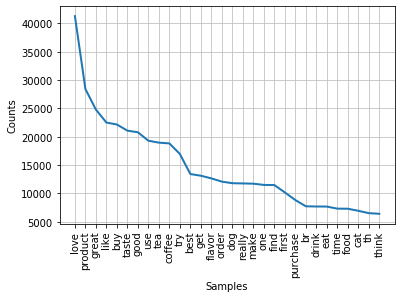

In [39]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

And, Finally we can see set of words that are most common among all the reviews in dataset. These most frequent words are used for modelling further to get better results.

### Building of Bag of Words model

- Bag of Words model is basically used to convert the normal text into a set of individual words, also called bag of words which keeps a count of the total occurrences of most frequently used words.

- BoW model is created using CountVectorizer() function.

- CountVectorizer()function combinely tokenize and build vocabulary of known words.

- This creates sparse matrix. A matrix is a two-dimensional data object made of m rows and n columns, therefore having total m x n values. If most of the elements of the matrix have 0 value, then it is called a sparse matrix.

### Splitting datset into Train and test data for fitting various model:

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
y=df['sentiment']
x=df['review']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=0)


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(ngram_range = (1,1))
count_train=vectorizer.fit_transform(X_train.values)
count_test=vectorizer.transform(X_test.values)

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## LOGISTIC REGRESSION

In [43]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(count_train,y_train)
ytrain_pred = log_classifier.predict_proba(count_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(count_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9641860392923667
Logistic test roc-auc: 0.9192455039066356


## NAIVE BAYES

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb_classifier=MultinomialNB()
nb_classifier.fit(count_train,y_train)
ytrain_pred2 = nb_classifier.predict_proba(count_train)
print('NB train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred2[:,1])))
ytest_pred2 = nb_classifier.predict_proba(count_test)
print('NB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred2[:,1])))

NB train roc-auc: 0.919997129304163
NB test roc-auc: 0.9002064482214842


## RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(count_train, y_train)
ytrain_pred1 = rf_model.predict_proba(count_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred1[:,1])))
ytest_pred1 = rf_model.predict_proba(count_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred1[:,1])))

RF train roc-auc: 0.9998221228626754
RF test roc-auc: 0.81953940907577


## XGBOOST ALGORITHM

In [46]:
from xgboost import XGBClassifier
xg_model= XGBClassifier()
xg_model.fit(count_train,y_train)
ytrain_pred3 = xg_model.predict_proba(count_train)
print('XGBOOST train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred3[:,1])))
ytest_pred3 = xg_model.predict_proba(count_test)
print('XGBOOST test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred3[:,1])))

XGBOOST train roc-auc: 0.9378975511545063
XGBOOST test roc-auc: 0.9158235890400612


In [47]:
pred=[]
for model in [log_classifier,rf_model,nb_classifier,xg_model]:
    pred.append(pd.Series(model.predict_proba(count_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9324430764662776


In [48]:
pd.concat(pred,axis=1)

,0,1,2,3
0,9.995606e-01,1.0,9.999998e-01,0.991054
1,9.322026e-01,0.5,2.842419e-01,0.294137
2,9.999902e-01,0.6,9.999995e-01,0.997345
3,1.748276e-02,0.5,4.975948e-08,0.375512
4,9.968811e-01,1.0,9.999942e-01,0.996141
...,...,...,...,...
129908,7.451250e-11,0.0,5.508059e-54,0.021751
129909,9.298893e-01,0.8,9.457057e-01,0.825020
129910,9.947120e-01,0.8,9.998911e-01,0.877783
129911,9.984743e-01,0.9,9.999974e-01,0.969426


In [49]:
final_prediction

0         0.997654
1         0.502645
2         0.899334
3         0.223249
4         0.998254
            ...   
129908    0.005438
129909    0.875154
129910    0.918097
129911    0.966974
129912    0.941050
Length: 129913, dtype: float64

In [50]:
#### Calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.99997169, 0.99997169, 0.99947281, ..., 0.03285117, 0.03269862,
       0.00226827])

In [51]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
13501,0.549217,0.889657
13498,0.549419,0.889649
13500,0.549225,0.889649
13502,0.549188,0.889649
13503,0.549158,0.889649


In [52]:
a=accuracy_ls[accuracy_ls.accuracy == accuracy_ls.accuracy.max()]
a

,thresholds,accuracy
13501,0.549217,0.889657


In [53]:
a.thresholds.max()

0.5492166081253529

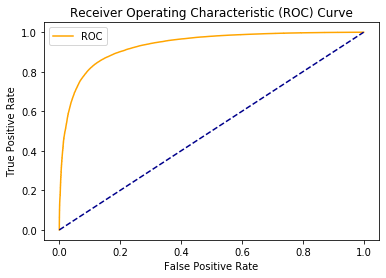

In [54]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

### Logistic Regression with threshold on Unigram model:

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
clf = LogisticRegression(class_weight="balanced")
clf.fit(count_train, y_train)
THRESHOLD =a.thresholds.max()
preds = np.where(clf.predict_proba(count_test)[:,1] > THRESHOLD, 1, 0)
preds
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.859290
recall,0.863881
precision,0.951255
roc_auc_score,0.853445


### Random Forest with threshold on Unigram model:

In [56]:
clf1 = RandomForestClassifier()
clf1.fit(count_train, y_train)
THRESHOLD = a.thresholds.max()
preds1 = np.where(clf1.predict_proba(count_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds1), recall_score(y_test, preds1),
                   precision_score(y_test, preds1), roc_auc_score(y_test, preds1)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.821773
recall,0.957262
precision,0.837495
roc_auc_score,0.649270


### Naive Bayes with Threshold on Unigram model:

In [57]:
clf2 = MultinomialNB()
clf2.fit(count_train, y_train)
THRESHOLD = a.thresholds.max()
preds2 = np.where(clf2.predict_proba(count_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds2), recall_score(y_test, preds2),
                   precision_score(y_test, preds2), roc_auc_score(y_test, preds2)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.868373
recall,0.910123
precision,0.920257
roc_auc_score,0.815219


### XGBoost Classifier with Threshold on Unigram model:

In [58]:
clf3 = XGBClassifier()
clf3.fit(count_train, y_train)
THRESHOLD = a.thresholds.max()
preds3 = np.where(clf3.predict_proba(count_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds3), recall_score(y_test, preds3),
                   precision_score(y_test, preds3), roc_auc_score(y_test, preds3)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.873207
recall,0.949407
precision,0.894520
roc_auc_score,0.776191


* There are drawbacks with Bag of Words as this do not consider semantic meaning of sentences.Also Bag of Words model is unable to remove any outliers in the collection of words.
  And hence, we will go to next model of bi-gram and n-gram model

##### Bi-gram basically means pair of two consecutive words used for creating dictionary

# BIGRAM MODEL:

In [59]:
count=CountVectorizer(ngram_range=(1,2))
Bigram_train=count.fit_transform(X_train.values)
Bigram_test=count.transform(X_test.values)

## LOGISTIC REGRESSION FOR BI-GRAM MODEL:

In [60]:
from sklearn.linear_model import LogisticRegression
log_classifier1=LogisticRegression()
log_classifier1.fit(Bigram_train,y_train)
ytrain_pred01 = log_classifier1.predict_proba(Bigram_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred01[:,1])))
ytest_pred01 = log_classifier1.predict_proba(Bigram_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred01[:,1])))

Logistic train roc-auc: 0.9999798224237666
Logistic test roc-auc: 0.9465126371183313


## NAIVE BAYES FOR BI-GRAM MODEL:

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb_classifier1=MultinomialNB()
nb_classifier1.fit(Bigram_train,y_train)
ytrain_pred02 = nb_classifier1.predict_proba(Bigram_train)
print('NB train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred02[:,1])))
ytest_pred02 = nb_classifier1.predict_proba(Bigram_test)
print('NB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred02[:,1])))

NB train roc-auc: 0.9784252033313041
NB test roc-auc: 0.9026639574738469


## RANDOM FOREST FOR BI-GRAM MODEL:

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_model1 = RandomForestClassifier()
rf_model1.fit(Bigram_train, y_train)
ytrain_pred03 = rf_model1.predict_proba(Bigram_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred03[:,1])))
ytest_pred03 = rf_model1.predict_proba(Bigram_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred03[:,1])))

RF train roc-auc: 0.9998610896831301
RF test roc-auc: 0.8346455339197582


## XGBOOST FOR BI-GRAM MODEL:

In [63]:
from xgboost import XGBClassifier
xg_model1= XGBClassifier()
xg_model1.fit(Bigram_train,y_train)
ytrain_pred04 = xg_model1.predict_proba(Bigram_train)
print('XGBOOST train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred04[:,1])))
ytest_pred04 = xg_model1.predict_proba(Bigram_test)
print('XGBOOST test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred04[:,1])))

XGBOOST train roc-auc: 0.9462932469218119
XGBOOST test roc-auc: 0.9281840525820514


In [64]:
pred1=[]
for model in [log_classifier1,rf_model1,nb_classifier1,xg_model1]:
    pred1.append(pd.Series(model.predict_proba(Bigram_test)[:,1]))
final_prediction1=pd.concat(pred1,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction1)))

Ensemble test roc-auc: 0.9513834733781685


In [65]:
pd.concat(pred1,axis=1)
final_prediction1

0         0.998455
1         0.785207
2         0.974006
3         0.230357
4         0.997478
            ...   
129908    0.029684
129909    0.912526
129910    0.958481
129911    0.946838
129912    0.924326
Length: 129913, dtype: float64

In [66]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, final_prediction1)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_ls1 = []
for thres in thresholds:
    y_pred1 = np.where(final_prediction1 >thres,1,0)
    accuracy_ls1.append(accuracy_score(y_test, y_pred1, normalize=True))
    
accuracy_ls1 = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls1)],
                        axis=1)
accuracy_ls1.columns = ['thresholds', 'accuracy']
accuracy_ls1.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls1.head()

,thresholds,accuracy
9873,0.678167,0.913889
9872,0.678188,0.913889
9846,0.679052,0.913889
9847,0.678960,0.913889
9863,0.678381,0.913881


In [80]:
a1=accuracy_ls1[accuracy_ls1.accuracy == accuracy_ls1.accuracy.max()]
a1

,thresholds,accuracy
9873,0.678167,0.913889
9872,0.678188,0.913889
9846,0.679052,0.913889
9847,0.678960,0.913889


In [81]:
a1.thresholds.max()

0.6790524043548951

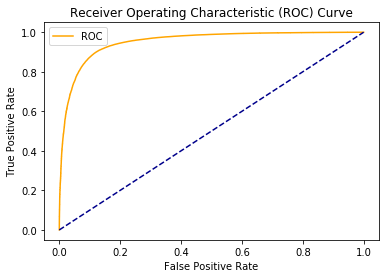

In [82]:
def plot_roc_curve(fpr1, tpr1):
    plt.plot(fpr1, tpr1, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr1,tpr1)

### Logistic Regression with threshold on Bigram model:

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
clf_1 = LogisticRegression(class_weight="balanced")
clf_1.fit(Bigram_train, y_train)
THRESHOLD1 = a1.thresholds.max()
preds_01 = np.where(clf_1.predict_proba(Bigram_test)[:,1] > THRESHOLD1, 1, 0)
preds_01
pd.DataFrame(data=[accuracy_score(y_test, preds_01), recall_score(y_test, preds_01),
                   precision_score(y_test, preds_01), roc_auc_score(y_test, preds_01)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.900202
recall,0.912520
precision,0.957545
roc_auc_score,0.884519


###  Random Forest Classifier with Threshold on Bigram model:

In [84]:
clf01 = RandomForestClassifier()
clf01.fit(Bigram_train, y_train)
THRESHOLD1 = a1.thresholds.max()
preds01 = np.where(clf01.predict_proba(Bigram_test)[:,1] > THRESHOLD1, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds01), recall_score(y_test, preds01),
                   precision_score(y_test, preds01), roc_auc_score(y_test, preds01)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.833920
recall,0.933352
precision,0.864523
roc_auc_score,0.707323


### Naive Bayes with Threshold on Bigram Model:

In [85]:
clf02 = MultinomialNB()
clf02.fit(Bigram_train, y_train)
THRESHOLD1 = a1.thresholds.max()
preds02 = np.where(clf02.predict_proba(Bigram_test)[:,1] > THRESHOLD1, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds02), recall_score(y_test, preds02),
                   precision_score(y_test, preds02), roc_auc_score(y_test, preds02)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.889672
recall,0.972567
precision,0.895079
roc_auc_score,0.784131


### XGBoost Classifier with Threshold on Bigram model:

In [86]:
clf03 = XGBClassifier()
clf03.fit(Bigram_train, y_train)
THRESHOLD1 = a1.thresholds.max()
preds03 = np.where(clf03.predict_proba(Bigram_test)[:,1] > THRESHOLD1, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds03), recall_score(y_test, preds03),
                   precision_score(y_test, preds03), roc_auc_score(y_test, preds03)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.877618
recall,0.907833
precision,0.933450
roc_auc_score,0.839148


# TF-IDF VECTOR MODEL:

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf_train = tf.fit_transform(X_train.values)
tf_test = tf.transform(X_test.values)

## LOGISTIC REGRESSION FOR TF-IDF MODEL:

In [88]:
from sklearn.linear_model import LogisticRegression
log_classifier2=LogisticRegression()
log_classifier2.fit(tf_train,y_train)
ytrain_pred05 = log_classifier2.predict_proba(tf_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred05[:,1])))
ytest_pred05 = log_classifier2.predict_proba(tf_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred05[:,1])))

Logistic train roc-auc: 0.9496924426197597
Logistic test roc-auc: 0.9374357561272001


## NAIVE-BAYES FOR TF-IDF MODEL:

In [89]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb_classifier2=MultinomialNB()
nb_classifier2.fit(tf_train,y_train)
ytrain_pred06 = nb_classifier2.predict_proba(tf_train)
print('NB train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred06[:,1])))
ytest_pred06 = nb_classifier2.predict_proba(tf_test)
print('NB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred06[:,1])))

NB train roc-auc: 0.9135575805661407
NB test roc-auc: 0.9007636944541182


## RANDOM FOREST FOR TF-IDF MODEL:

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf_model2 = RandomForestClassifier()
rf_model2.fit(tf_train, y_train)
ytrain_pred07 = rf_model2.predict_proba(tf_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred07[:,1])))
ytest_pred07 = rf_model2.predict_proba(tf_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred07[:,1])))

RF train roc-auc: 0.999829945736963
RF test roc-auc: 0.8141164910781582


## XGBOOST FOR TF-IDF MODEL:

In [91]:
from xgboost import XGBClassifier
xg_model2= XGBClassifier()
xg_model2.fit(tf_train,y_train)
ytrain_pred08 = xg_model2.predict_proba(tf_train)
print('XGBOOST train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred08[:,1])))
ytest_pred08 = xg_model2.predict_proba(tf_test)
print('XGBOOST test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred08[:,1])))

XGBOOST train roc-auc: 0.9425509647481702
XGBOOST test roc-auc: 0.9161625689741081


In [92]:
pred2=[]
for model in [log_classifier2,rf_model2,nb_classifier2,xg_model2]:
    pred2.append(pd.Series(model.predict_proba(tf_test)[:,1]))
final_prediction2=pd.concat(pred2,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction2)))

Ensemble test roc-auc: 0.9348706998522499


In [93]:
pd.concat(pred2,axis=1)
final_prediction2

0         0.991566
1         0.639947
2         0.938361
3         0.375503
4         0.995375
            ...   
129908    0.290318
129909    0.889452
129910    0.934090
129911    0.987760
129912    0.859929
Length: 129913, dtype: float64

In [94]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, final_prediction2)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_ls2 = []
for thres in thresholds:
    y_pred2 = np.where(final_prediction2 >thres,1,0)
    accuracy_ls2.append(accuracy_score(y_test, y_pred2, normalize=True))
    
accuracy_ls2 = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls2)],
                        axis=1)
accuracy_ls2.columns = ['thresholds', 'accuracy']
accuracy_ls2.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls2.head()

,thresholds,accuracy
10589,0.653418,0.893583
10438,0.658432,0.893583
10341,0.661946,0.893567
10440,0.658338,0.893567
10435,0.658524,0.893567


In [96]:
a2=accuracy_ls2[accuracy_ls2.accuracy == accuracy_ls2.accuracy.max()]
a2

,thresholds,accuracy
10589,0.653418,0.893583
10438,0.658432,0.893583


In [97]:
a2.thresholds.max()

0.6584324775212763

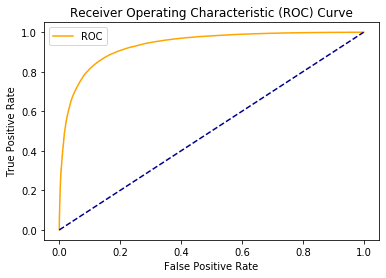

In [98]:
def plot_roc_curve(fpr2, tpr2):
    plt.plot(fpr2, tpr2, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr2,tpr2)

### Logistic Regression with threshold on TF-IDF model:

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
clf_2= LogisticRegression(class_weight="balanced")
clf_2.fit(tf_train, y_train)
THRESHOLD2 = a2.thresholds.max()
preds_02 = np.where(clf_2.predict_proba(tf_test)[:,1] > THRESHOLD2, 1, 0)
preds_02
pd.DataFrame(data=[accuracy_score(y_test, preds_02), recall_score(y_test, preds_02),
                   precision_score(y_test, preds_02), roc_auc_score(y_test, preds_02)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.815084
recall,0.783546
precision,0.974378
roc_auc_score,0.855238


### Random Forest with threshold on TF-IDF  model:

In [100]:
clf04 = RandomForestClassifier()
clf04.fit(tf_train, y_train)
THRESHOLD2 = a2.thresholds.max()
preds04 = np.where(clf04.predict_proba(tf_test)[:,1] > THRESHOLD2, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds04), recall_score(y_test, preds04),
                   precision_score(y_test, preds04), roc_auc_score(y_test, preds04)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.818771
recall,0.902376
precision,0.870109
roc_auc_score,0.712325


### Naive Bayes with Threshold on TF-IDF Model:

In [101]:
clf05 = MultinomialNB()
clf05.fit(tf_train, y_train)
THRESHOLD2 = a2.thresholds.max()
preds05 = np.where(clf05.predict_proba(tf_test)[:,1] > THRESHOLD2, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds05), recall_score(y_test, preds05),
                   precision_score(y_test, preds05), roc_auc_score(y_test, preds05)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.833735
recall,0.988760
precision,0.830424
roc_auc_score,0.636357


### XGBoost with Threshold on TF-IDF model:

In [102]:
clf06 = XGBClassifier()
clf06.fit(tf_train, y_train)
THRESHOLD2 = a2.thresholds.max()
preds06 = np.where(clf06.predict_proba(tf_test)[:,1] > THRESHOLD2, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds06), recall_score(y_test, preds06),
                   precision_score(y_test, preds06), roc_auc_score(y_test, preds06)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.867588
recall,0.905919
precision,0.922913
roc_auc_score,0.818786
